In [18]:
# Importowanie bibliotek
import numpy as np  # Praca z tablicami i operacje matematyczne
import pandas as pd  # Praca z ramkami danych
import matplotlib.pyplot as plt  # Tworzenie wykresów
import seaborn as sns  # Wizualizacja danych
import warnings  # Obsługa ostrzeżeń
import sklearn.metrics as skm  # Metryki oceny modeli
import sklearn.model_selection as skms  # Podział danych na zbiory
import sklearn.preprocessing as skp  # Normalizacja danych
import librosa  # Przetwarzanie sygnałów audio
import librosa.display as lplt  # Wizualizacja sygnałów audio
import tensorflow as tf  # Biblioteka do sieci neuronowych
import keras as k  # Biblioteka do budowania modeli
from sklearn.decomposition import PCA  # Analiza głównych składowych
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Skalowanie danych
import IPython  # Odtwarzanie audio w notebookach
from sklearn.manifold import TSNE 

In [19]:
# Ustawienia
sns.set_style('darkgrid')  # Ustawienie stylu wykresów
warnings.filterwarnings('ignore')  # Ignorowanie ostrzeżeń
seed = 42  # Ustawienie ziarna dla powtarzalności wyników
np.random.seed(seed)  # Ustawienie ziarna dla numpy
tf.random.set_seed(seed)  # Ustawienie ziarna dla tensorflow

In [20]:
# Wczytywanie danych
data_frame = pd.read_csv('D:/PWr/6 semestr/Sieci neuronowe 2/Data/features_3_sec.csv')  # Wczytywanie danych z pliku CSV
print("Dataset shape:", data_frame.shape)  # Wyświetlanie kształtu ramki danych
print("Count of each label:")  # Wyświetlanie liczby próbek dla każdej etykiety
print(data_frame.label.value_counts().reset_index())

Dataset shape: (9990, 60)
Count of each label:
       label  count
0      blues   1000
1       jazz   1000
2      metal   1000
3        pop   1000
4     reggae   1000
5      disco    999
6  classical    998
7     hiphop    998
8       rock    998
9    country    997


In [21]:
# Prezentacja części przykładowych parametrów z bazy danych, dla 5 przykładowych, 3 sekundowych próbek utworów
df = pd.read_csv('D:/PWr/6 semestr/Sieci neuronowe 2/Data/features_3_sec.csv')
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [22]:
# Wizualizacja danych
audio_file_path = 'D:/PWr/6 semestr/Sieci neuronowe 2/Data/genres_original/blues/blues.00001.wav'  # Ścieżka do pliku audio
audio_data, sample_rate = librosa.load(audio_file_path)  # Wczytywanie pliku audio
audio_data, _ = librosa.effects.trim(audio_data)  # Przycinanie ciszy z początku i końca nagrania

# Odtworzenie pliku audio
IPython.display.Audio(audio_data, rate=sample_rate)  # Odtwarzanie pliku audio

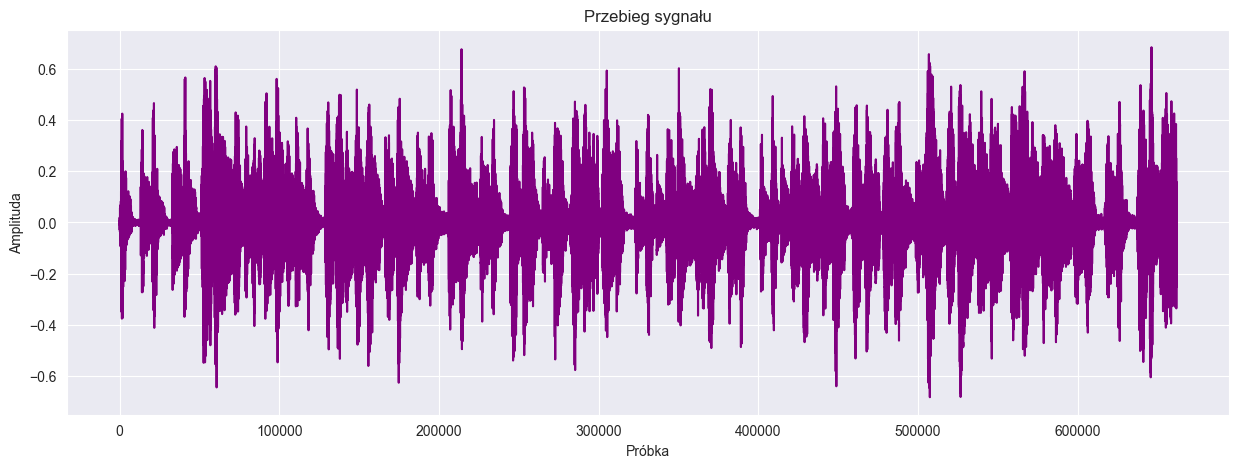

In [23]:
# Wykres sygnału audio
plt.figure(figsize=(15, 5))  # Ustawienie rozmiaru wykresu
plt.plot(audio_data, color='purple')  # Tworzenie wykresu sygnału audio
plt.xlabel('Próbka')  # Etykieta osi X
plt.ylabel('Amplituda')  # Etykieta osi Y
plt.title('Przebieg sygnału')  # Tytuł wykresu
plt.show()  # Wyświetlanie wykresu


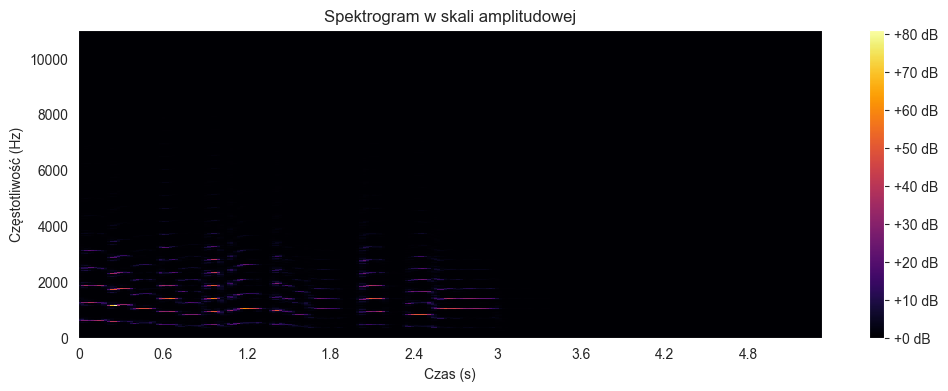

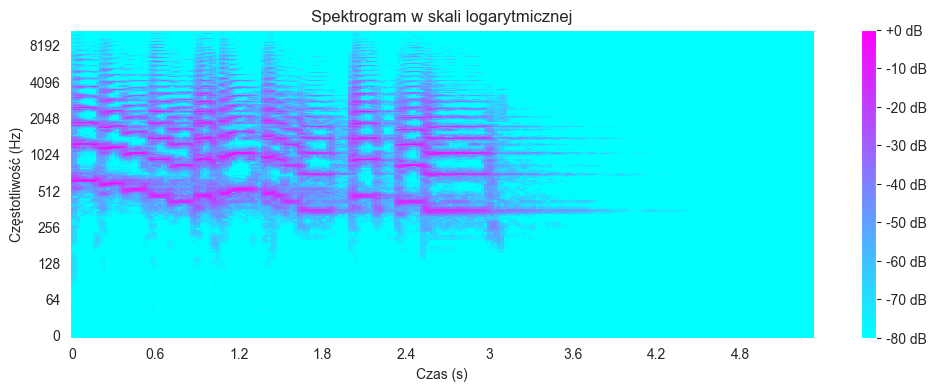

In [24]:
# Domyślny rozmiar okna FFT
n_fft = 2048  # rozmiar okna
hop_length = 512  # krok okna dla STFT

# ładowanie danych audio i częstotliwości próbkowania
audio_data, sr = librosa.load(librosa.example('trumpet'))

# Obliczanie STFT
stft = librosa.stft(audio_data, n_fft=n_fft, hop_length=hop_length)
stft_db = librosa.amplitude_to_db(stft, ref=np.max)

# Wyświetlenie spektrogramu w skali amplitudowej
plt.figure(figsize=(12, 4))
lplt.specshow(np.abs(stft), sr=sr, hop_length=hop_length, x_axis='time', y_axis='hz', cmap='inferno')
plt.colorbar(format='%+2.0f dB')
plt.title("Spektrogram w skali amplitudowej")
plt.xlabel("Czas (s)")
plt.ylabel("Częstotliwość (Hz)")
plt.show()

# Wyświetlenie spektrogramu w skali logarytmicznej
plt.figure(figsize=(12, 4))
lplt.specshow(stft_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar(format='%+2.0f dB')
plt.title("Spektrogram w skali logarytmicznej")
plt.xlabel("Czas (s)")
plt.ylabel("Częstotliwość (Hz)")
plt.show()


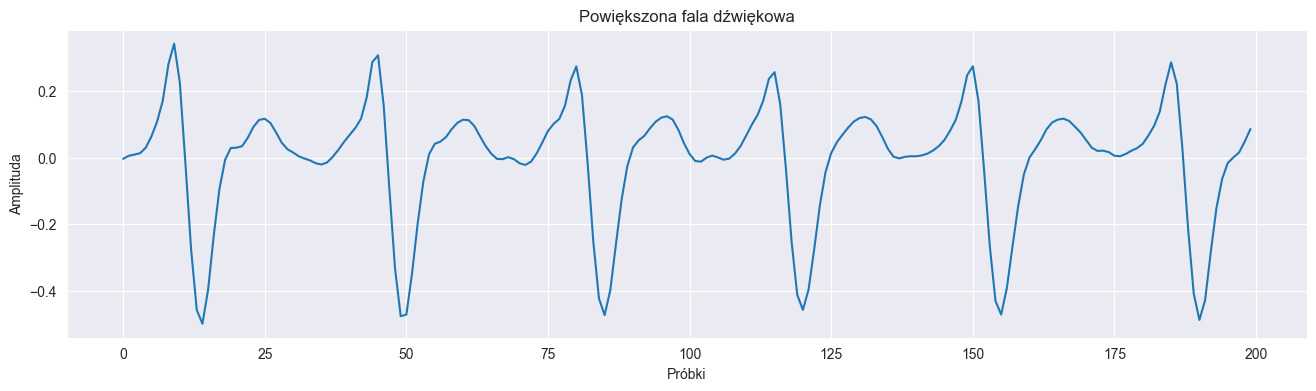

In [25]:
# Wykres powiększonej fali dźwiękowej
start = 1000
end = 1200    
plt.figure(figsize=(16, 4))
plt.plot(audio_data[start:end])
plt.title("Powiększona fala dźwiękowa")
plt.xlabel("Próbki")
plt.ylabel("Amplituda")
plt.show()

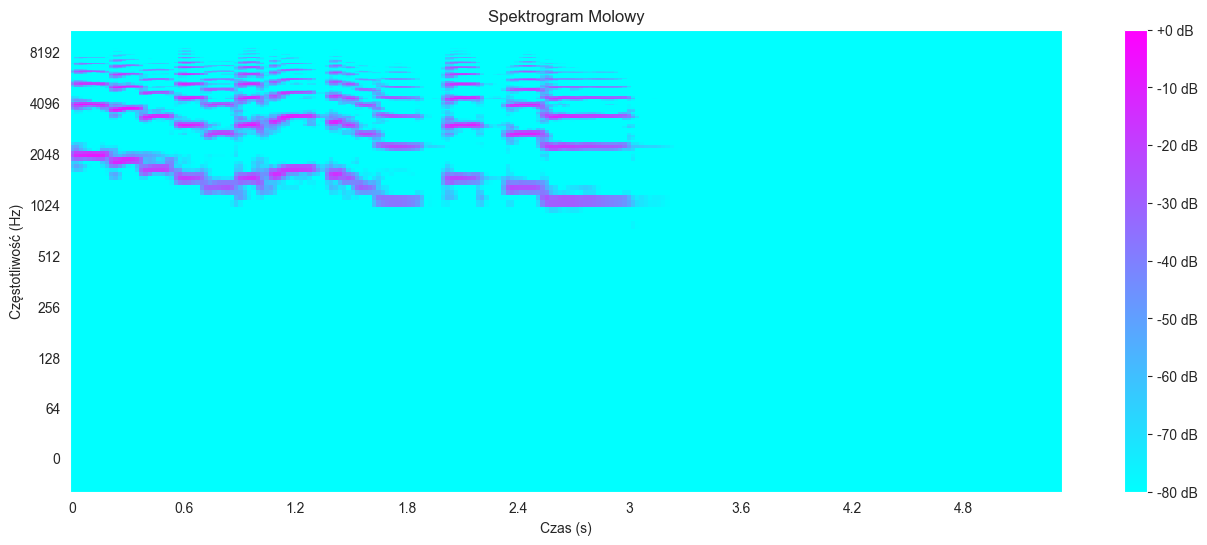

In [26]:
# Wykres spektorgramu molowego
mel_spec = librosa.feature.melspectrogram(y=audio_data, sr=sr)
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

plt.figure(figsize=(16, 6))
lplt.specshow(mel_spec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar(format='%+2.0f dB')
plt.title("Spektrogram Molowy")
plt.xlabel("Czas (s)")
plt.ylabel("Częstotliwość (Hz)")
plt.show()

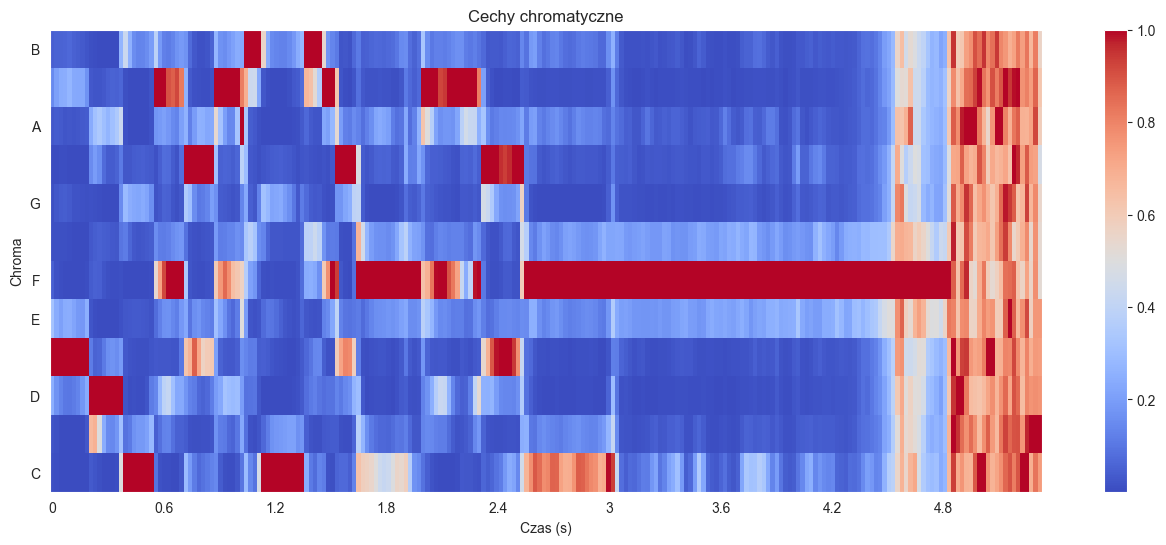

In [27]:
# Wykres cech chromatycznych (chroma features)
chroma = librosa.feature.chroma_stft(y=audio_data, sr=sr)

plt.figure(figsize=(16, 6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title("Cechy chromatyczne")
plt.xlabel("Czas (s)")
plt.ylabel("Chroma")
plt.show()

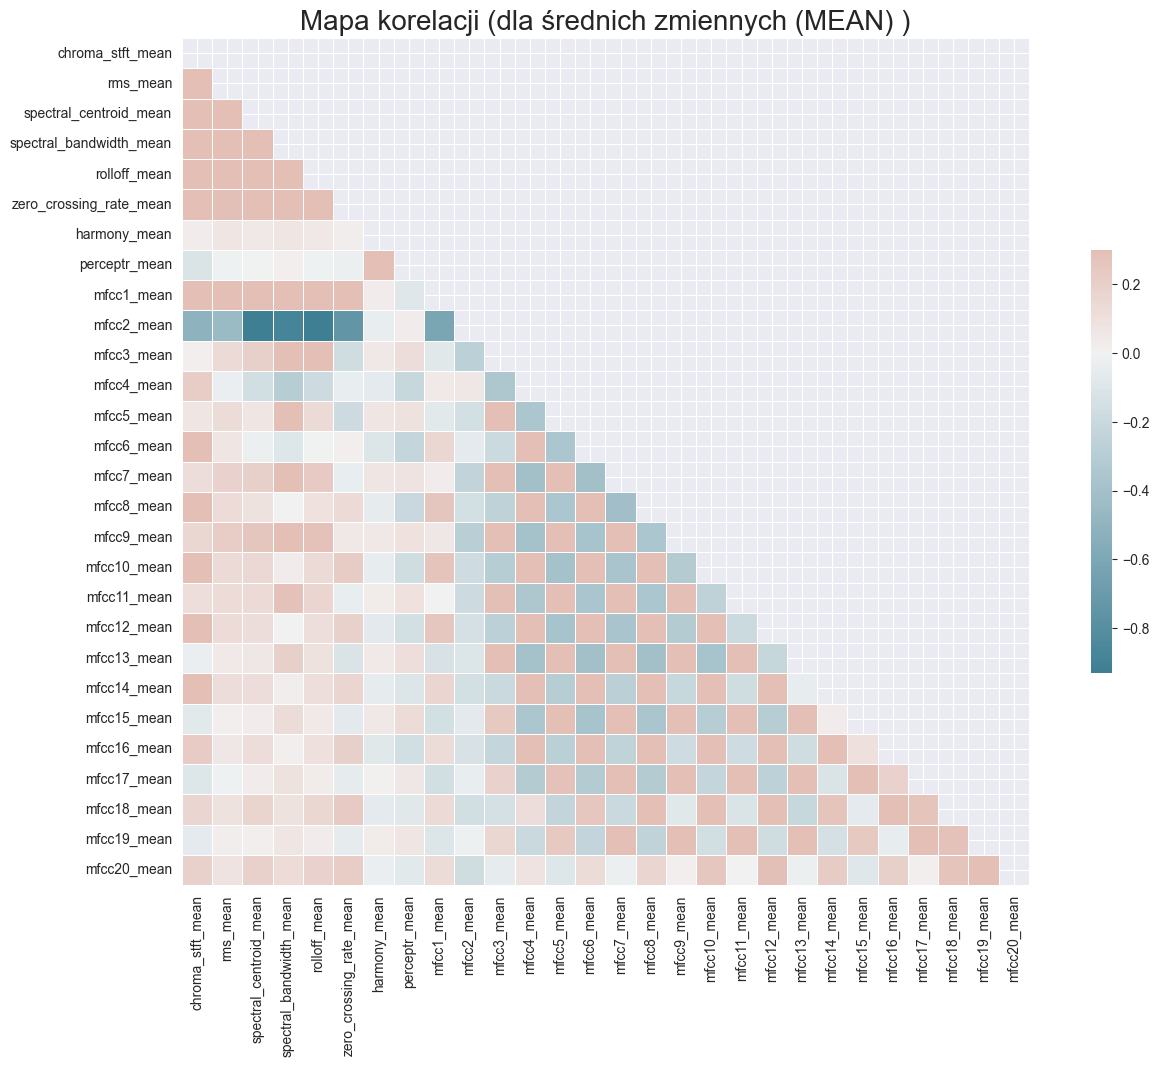

In [28]:
# Obliczanie macierzy korelacji
spike_cols = [col for col in df.columns if 'mean' in col]
corr = df[spike_cols].corr()

# Generowanie maski dla górnego trójkąta
mask = np.triu(np.ones_like(corr, dtype=bool))

# Ustawienie figury w matplotlib
f, ax = plt.subplots(figsize=(16, 11))

# Generowanie niestandardowej mapy kolorów
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Rysowanie mapy ciepła z maską i poprawnym stosunkiem aspektów
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})

plt.title('Mapa korelacji (dla średnich zmiennych (MEAN) )', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("Mapa_Korelacji.png")

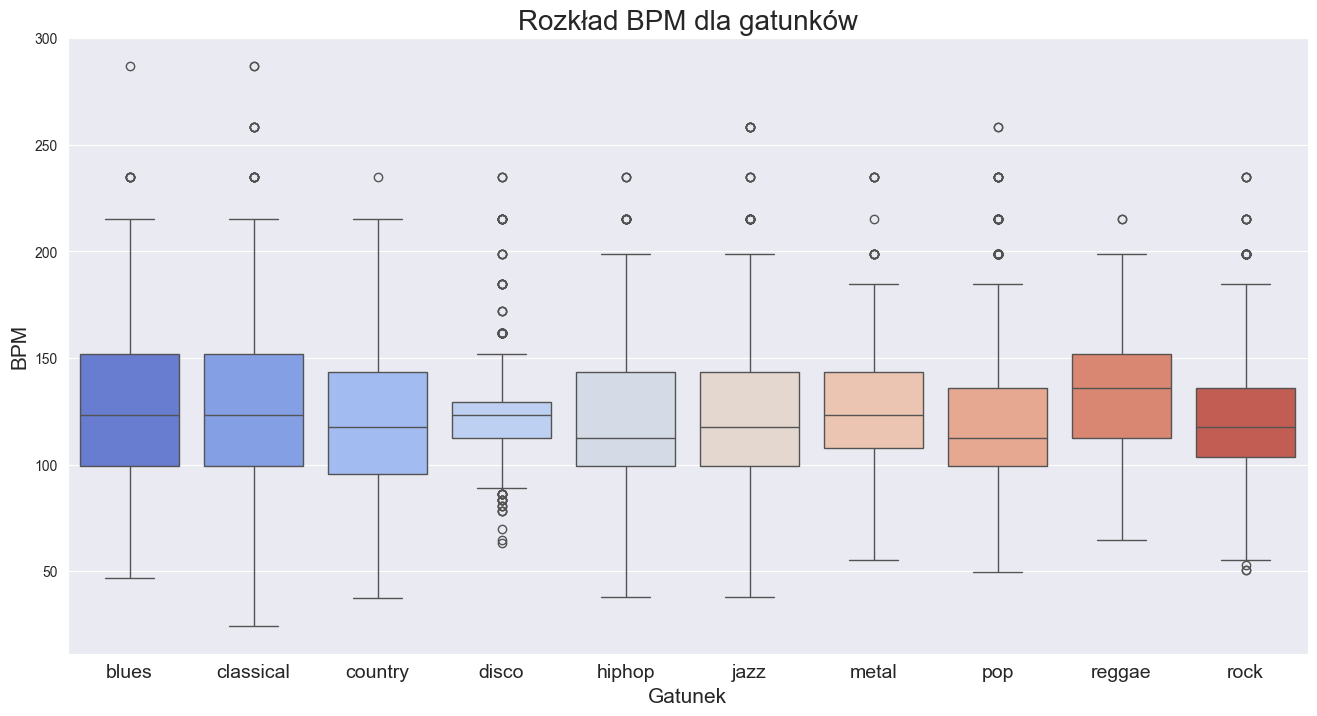

In [29]:
# Wizualizacja tempo
x_temp = data_frame[["label", "tempo"]]  # Wybór kolumn z danymi
plt.figure(figsize=(16, 8))  # Ustawienie rozmiaru wykresu
sns.boxplot(x="label", y="tempo", data=x_temp, palette='coolwarm')  # Tworzenie wykresu pudełkowego dla tempa w różnych gatunkach
plt.title('Rozkład BPM dla gatunków', fontsize=20)  # Tytuł wykresu
plt.xticks(fontsize=14)  # Rozmiar czcionki etykiet osi X
plt.yticks(fontsize=10)  # Rozmiar czcionki etykiet osi Y
plt.xlabel("Gatunek", fontsize=15)  # Etykieta osi X
plt.ylabel("BPM", fontsize=15)  # Etykieta osi Y
plt.savefig("BPM_Boxplot_Modified.png")  # Zapis wykresu do pliku

In [30]:
# Normalizacja danych
data_features = data_frame.iloc[:, 1:]  # Wybór kolumn z cechami (bez pierwszej kolumny)
y_labels = data_features['label']  # Etykiety
X_features = data_features.loc[:, data_features.columns != 'label']  # Cechy (bez kolumny z etykietami)
min_max_scaler = MinMaxScaler()  # Inicjalizacja skalera
X_features_scaled = pd.DataFrame(min_max_scaler.fit_transform(X_features), columns=X_features.columns)  # Normalizacja cech

Text(0, 0.5, 'Główna składowa 2')

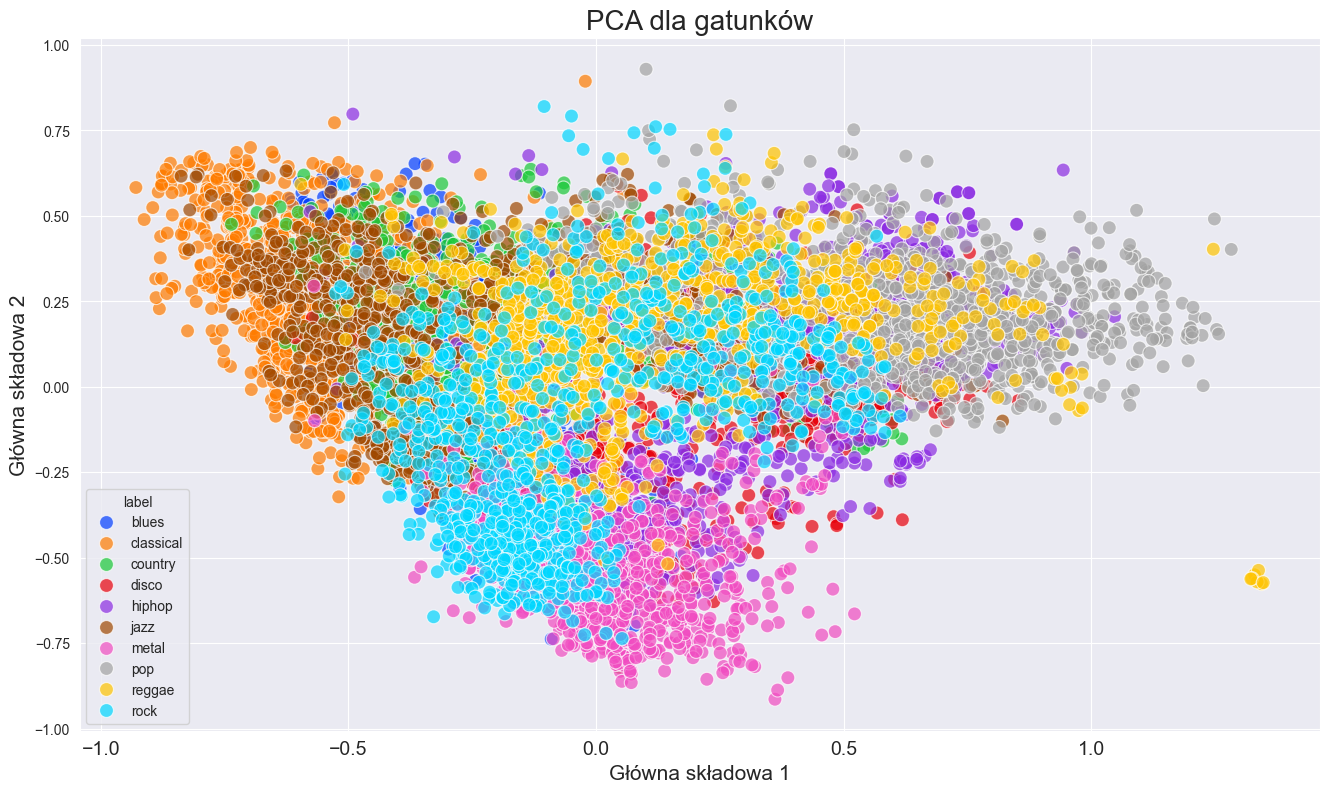

In [31]:
# PCA
pca_model = PCA(n_components=2)  # Inicjalizacja PCA z 2 głównymi składowymi
principal_components = pca_model.fit_transform(X_features_scaled)  # Przeprowadzenie PCA
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])  # Tworzenie ramki danych z głównymi składowymi
final_df = pd.concat([principal_df, y_labels], axis=1)  # Łączenie danych z etykietami

plt.figure(figsize=(16, 9))  # Ustawienie rozmiaru wykresu
sns.scatterplot(x='PC1', y='PC2', data=final_df, hue='label', alpha=0.7, s=100, palette='bright')  # Tworzenie wykresu rozrzutu dla głównych składowych
plt.title('PCA dla gatunków', fontsize=20)  # Tytuł wykresu
plt.xticks(fontsize=14)  # Rozmiar czcionki etykiet osi X
plt.yticks(fontsize=10)  # Rozmiar czcionki etykiet osi Y
plt.xlabel("Główna składowa 1", fontsize=15)  # Etykieta osi X
plt.ylabel("Główna składowa 2", fontsize=15)  # Etykieta osi

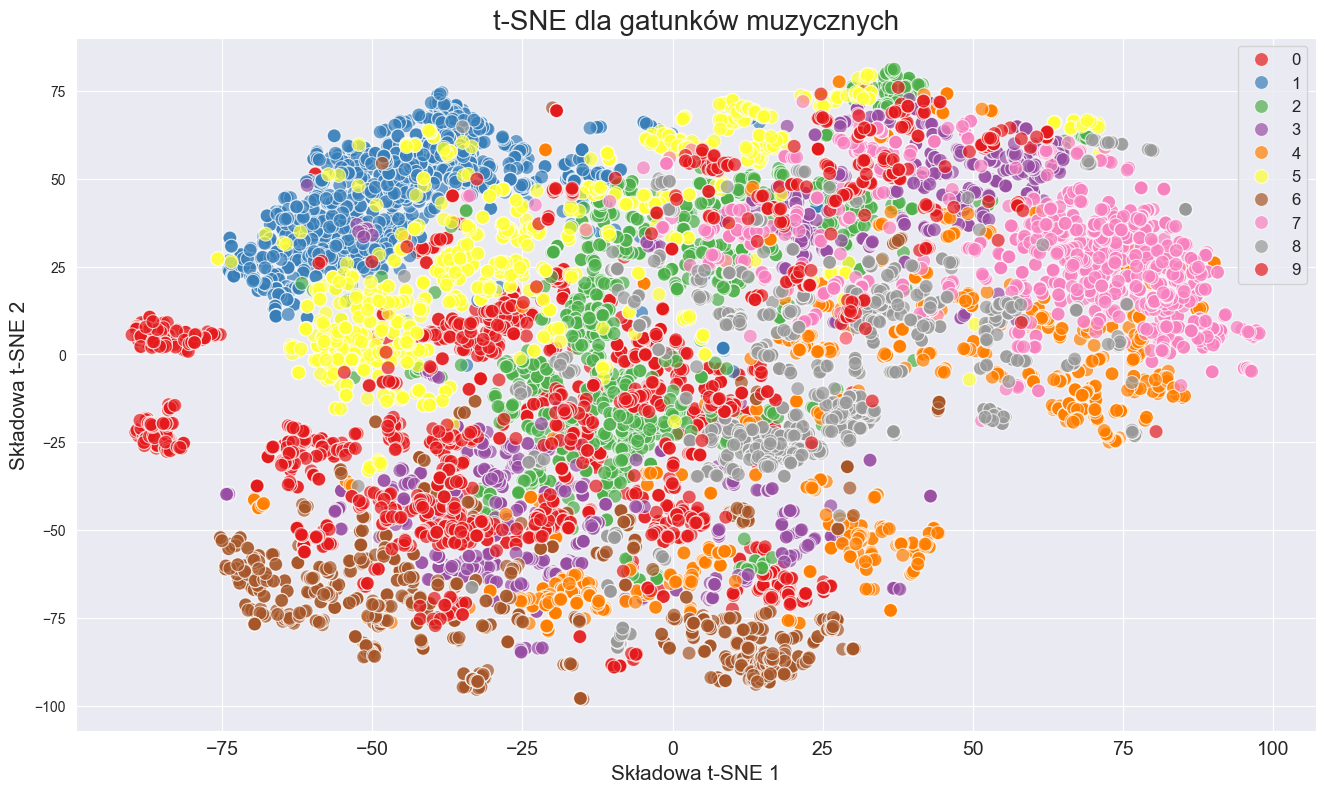

In [35]:
# Wybór danych i podział na cechy (X) i etykiety (y)
data = data_frame.iloc[:, 1:]  # Wybór wszystkich wierszy, począwszy od drugiej kolumny
y = data['label']
X = data.drop('label', axis=1)  # Usunięcie kolumny 'label' z danych cech

# Normalizacja danych
cols = X.columns
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=cols)
# t-SNE - redukcja do dwóch składowych
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(X)
tsneDf = pd.DataFrame(data=tsne_components, columns=['tsne1', 'tsne2'])
# Połączenie z etykietami
finalDf = pd.concat([tsneDf, y], axis=1)


 
# Wykres rozproszenia t-SNE z określoną paletą kolorów
palette = 'Set1' 
plt.figure(figsize=(16, 9))
sns.scatterplot(x="tsne1", y="tsne2", data=finalDf, hue="label", palette=palette, alpha=0.7, s=100)
plt.title('t-SNE dla gatunków muzycznych', fontsize=20)
plt.xlabel("Składowa t-SNE 1", fontsize=15)
plt.ylabel("Składowa t-SNE 2", fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)  
plt.savefig("tSNE.png")
plt.show()

In [33]:
# Przygotowanie danych
print("Columns with NA values:", list(data_frame.columns[data_frame.isnull().any()]))  # Sprawdzenie kolumn z brakującymi wartościami
label_index_map = {label: idx for idx, label in enumerate(data_frame.label.unique())}  # Mapowanie etykiet na indeksy
index_label_map = {idx: label for label, idx in label_index_map.items()}  # Mapowanie indeksów na etykiety
print(label_index_map)  # Wyświetlanie mapowania etykiet na indeksy
print(index_label_map)  # Wyświetlanie mapowania indeksów na etykiety
data_frame.label = data_frame.label.map(label_index_map)  # Zamiana etykiet na indeksy

# Losowanie próbek
data_frame_shuffled = data_frame.sample(frac=1, random_state=seed).reset_index(drop=True)  # Losowe przetasowanie danych
data_frame_shuffled.drop(['filename', 'length'], axis=1, inplace=True)  # Usunięcie niepotrzebnych kolumn
data_frame_y = data_frame_shuffled.pop('label')  # Etykiety
data_frame_X = data_frame_shuffled  # Cechy

# Podział danych na zbiory
X_train, df_test_valid_X, y_train, df_test_valid_y = skms.train_test_split(data_frame_X, data_frame_y, train_size=0.7, random_state=seed, stratify=data_frame_y)  # Podział danych na zbiór treningowy i testowo-walidacyjny
X_dev, X_test, y_dev, y_test = skms.train_test_split(df_test_valid_X, df_test_valid_y, train_size=0.66, random_state=seed, stratify=df_test_valid_y)  # Podział zbioru testowo-walidacyjnego na walidacyjny i testowy

print(f"Zbiór treningowy: {X_train.shape[0]} z {len(data_frame_shuffled)}")  # Informacja o liczbie próbek w zbiorze treningowym
print(f"Zbiór walidacyjny: {X_dev.shape[0]} z {len(data_frame_shuffled)}")  # Informacja o liczbie próbek w zbiorze walidacyjnym
print(f"Zbiór testowy: {X_test.shape[0]} z {len(data_frame_shuffled)}")  # Informacja o liczbie próbek w zbiorze testowym

# Normalizacja
scaler = StandardScaler()  # Inicjalizacja skalera
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)  # Normalizacja zbioru treningowego
X_dev = pd.DataFrame(scaler.transform(X_dev), columns=X_dev.columns)  # Normalizacja zbioru walidacyjnego
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)  # Normalizacja zbioru testowego


Columns with NA values: []
{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
{0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}
Zbiór treningowy: 6993 z 9990
Zbiór walidacyjny: 1978 z 9990
Zbiór testowy: 1019 z 9990


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │          29,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 202,826 (792.29 KB)

 Trainable params: 202,826 (792.29 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1657 - loss: 2.2670 - val_accuracy: 0.3878 - val_loss: 1.6934
Epoch 2/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3687 - loss: 1.7630 - val_accuracy: 0.5035 - val_loss: 1.3437
Epoch 3/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4553 - loss: 1.5097 - val_accuracy: 0.5642 - val_loss: 1.2070
Epoch 4/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5015 - loss: 1.3773 - val_accuracy: 0.6163 - val_loss: 1.0760
Epoch 5/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5545 - loss: 1.2460 - val_accuracy: 0.6567 - val_loss: 0.9947
Epoch 6/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5873 - loss: 1.1688 - val_accuracy: 0.6714 - val_loss: 0.9131
Epoch 7/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6149 - loss: 1.0867 - val_accuracy: 0.6987 - val_loss: 0.8627
Epoch 8/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6314 - loss: 1.0433 - val_accuracy: 0.7

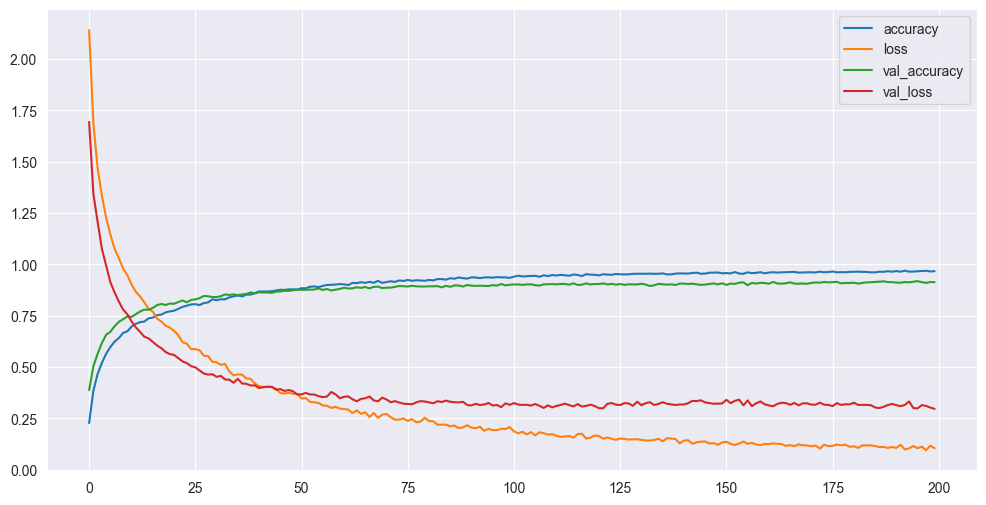

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9262 - loss: 0.2299 
Straty: 0.22823475301265717
Najlepsza dokładność: 92.73797869682312
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Przewidywany gatunek dla indeksu 50: blues
Wartości procentowe dla wybranego przykładu:
blues: 99.99%
classical: 0.00%
country: 0.00%
disco: 0.00%
hiphop: 0.00%
jazz: 0.00%
metal: 0.01%
pop: 0.00%
reggae: 0.00%
rock: 0.00%

Przypisane gatunki dla wartości 0-9:
0: blues
1: metal
2: hiphop
3: jazz
4: rock
5: disco
6: country
7: reggae
8: classical
9: pop


In [34]:
# Definiowanie i trenowanie modelu MLP

# Definicja progu dokładności
ACCURACY_THRESHOLD = 0.99  # Przykładowa wartość progu dokładności
class CustomCallback(k.callbacks.Callback):  # Klasa dla niestandardowego callbacku
    def on_epoch_end(self, epoch, logs=None):  # Funkcja wykonywana na końcu epoki
        if logs.get('val_accuracy') > ACCURACY_THRESHOLD:  # Sprawdzenie, czy dokładność walidacyjna przekroczyła próg
            print(f"\n\nZatrzymanie trenowania po osiągnięciu {ACCURACY_THRESHOLD * 100:.2f}% dokładności!")  # Informacja o zatrzymaniu trenowania
            self.model.stop_training = True  # Zatrzymanie trenowania

def train_mlp_model(model, epochs, optimizer):  # Funkcja do trenowania modelu MLP
    batch_size = 256  # Rozmiar partii
    callback = CustomCallback()  # Inicjalizacja callbacku
    model.compile(optimizer=optimizer,  # Kompilacja modelu
                  loss='sparse_categorical_crossentropy',  # Funkcja straty
                  metrics=['accuracy'])  # Metryka oceny
    return model.fit(X_train, y_train, validation_data=(X_dev, y_dev), epochs=epochs, batch_size=batch_size, callbacks=[callback])  # Trenowanie modelu

def plot_training_history(history):  # Funkcja do wyświetlania historii trenowania
    print("Maks. dokładność walidacyjna:", max(history.history["val_accuracy"]))  # Wyświetlanie maksymalnej dokładności walidacyjnej
    pd.DataFrame(history.history).plot(figsize=(12, 6))  # Tworzenie wykresu historii trenowania
    plt.show()  # Wyświetlanie wykresu

# Budowanie modelu MLP
mlp_model = k.models.Sequential([  # Inicjalizacja modelu sekwencyjnego
    k.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),  # Warstwa ukryta z 512 neuronami
    k.layers.Dropout(0.5),  # Warstwa dropout
    k.layers.Dense(256, activation='relu'),  # Warstwa ukryta z 256 neuronami
    k.layers.Dropout(0.5),  # Warstwa dropout
    k.layers.Dense(128, activation='relu'),  # Warstwa ukryta z 128 neuronami
    k.layers.Dropout(0.5),  # Warstwa dropout
    k.layers.Dense(64, activation='relu'),  # Warstwa ukryta z 64 neuronami
    k.layers.Dense(10, activation='softmax')  # Warstwa wyjściowa z 10 neuronami (po jednym na każdy gatunek)
])
# Wyświetlenie podsumowania modelu
print(mlp_model.summary())  # Wyświetlanie podsumowania architektury modelu

# Trenowanie modelu
mlp_model_history = train_mlp_model(mlp_model, epochs=200, optimizer='adam')  # Trenowanie modelu przez 300 epok

# Wyświetlenie historii trenowania
plot_training_history(mlp_model_history)  # Wyświetlanie historii trenowania

# Ocena modelu
test_loss, test_acc = mlp_model.evaluate(X_test, y_test, batch_size=256)  # Ocena modelu na zbiorze testowym
print("Straty:", test_loss)  # Wyświetlanie strat
print("Najlepsza dokładność:", test_acc * 100)  # Wyświetlanie dokładności

# Predykcje
predictions = mlp_model.predict(X_test)  # Predykcje na zbiorze testowym

# Wyświetlenie przewidywań
index_example = 50  # Indeks przykładowej próbki
example_percentages = predictions[index_example]  # Wartości procentowe dla przykładowej próbki
predicted_genre_index = np.argmax(example_percentages)  # Indeks przewidywanego gatunku
predicted_genre = index_label_map[predicted_genre_index]  # Przewidywany gatunek
print(f"Przewidywany gatunek dla indeksu {index_example}: {predicted_genre}")  # Wyświetlanie przewidywanego gatunku

print("Wartości procentowe dla wybranego przykładu:")
for i, percentage in enumerate(example_percentages):  # Wyświetlanie wartości procentowych dla każdego gatunku
    genre = index_label_map[i]  # Etykieta gatunku
    print(f"{genre}: {percentage * 100:.2f}%")

print("\nPrzypisane gatunki dla wartości 0-9:")
for i in range(10):  # Wyświetlanie przypisanych gatunków dla wartości 0-9
    genre_index = np.argsort(example_percentages)[-i - 1]  # Indeks gatunku
    genre = index_label_map[genre_index]  # Etykieta gatunku
    print(f"{i}: {genre}")